# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset train.csv

In [2]:
# Import the data set for Training KNN algorithm
train = pd.read_csv('train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Dividing dataset into features and labels

In [3]:
feature_columns = ['battery_power','blue','clock_speed','dual_sim',
                   'fc','four_g','int_memory','m_dep','mobile_wt','n_cores',
                    'pc','px_height','px_width','ram','sc_h','sc_w',
                   'talk_time','three_g','touch_screen','wifi']
X = train[feature_columns].values
y = train['price_range'].values

# Spliting dataset into training set and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

# Finding best fit k value

In [7]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.0925,
 0.1,
 0.0625,
 0.0875,
 0.0725,
 0.0625,
 0.0475,
 0.05,
 0.0575,
 0.0475,
 0.05,
 0.05,
 0.0475,
 0.05,
 0.045,
 0.045,
 0.0475,
 0.045,
 0.0525,
 0.0475,
 0.05,
 0.0525,
 0.05,
 0.0475,
 0.0525,
 0.0575,
 0.0625,
 0.055,
 0.0675,
 0.06]

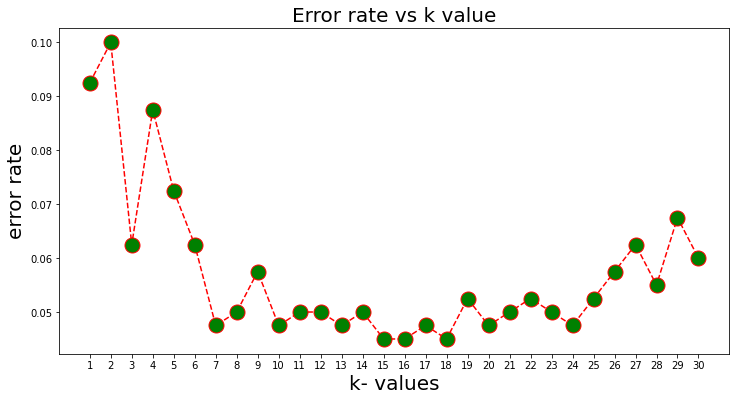

In [8]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

# Creating & Training KNN Model

## Making Classification

In [9]:
# K value set to be 10
knn = KNeighborsClassifier(n_neighbors=10)

# model training
knn.fit(X_train,y_train)

# testing the model
predicted_train = knn.predict(X_test)

## Evaluating Classification

In [10]:
# printing accuracy
accuracy = accuracy_score(y_test, predicted_train)*100
print('Accuracy : ' + str(round(accuracy, 2)) + ' %.')

Accuracy : 95.25 %.


In [11]:
reportKNN = classification_report(y_test, predicted_train, output_dict = True)
table_report = pd.DataFrame(reportKNN).transpose()
table_report

,precision,recall,f1-score,support
0,0.979381,1.000000,0.989583,95.0000
1,0.936842,0.967391,0.951872,92.0000
2,0.910000,0.919192,0.914573,99.0000
3,0.981481,0.929825,0.954955,114.0000
accuracy,0.952500,0.952500,0.952500,0.9525
macro avg,0.951926,0.954102,0.952746,400.0000
weighted avg,0.953024,0.952500,0.952475,400.0000


In [12]:
conf_matrix = confusion_matrix(y_test, predicted_train)
print(conf_matrix)

[[ 95   0   0   0]
 [  2  89   1   0]
 [  0   6  91   2]
 [  0   0   8 106]]


<AxesSubplot:>

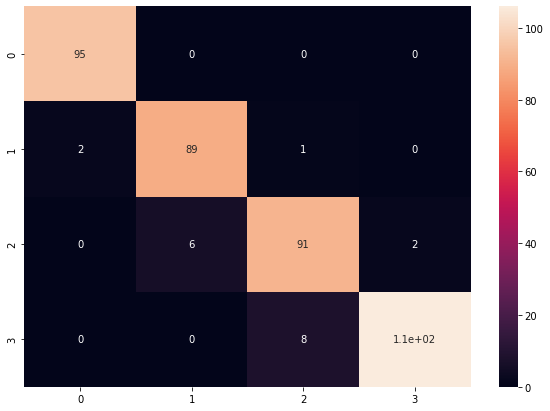

In [13]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True)

# Price classification of test.csv Using KNN for Classification

## Load dataset test.csv

In [14]:
# Import the data set for Testing KNN algorithm
test = pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


## Drop columns

In [15]:
test.drop('id', inplace=True, axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## Classification result

In [16]:
predicted_price = knn.predict(test)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [17]:
test['price_range']=predicted_price
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
